### Visualize and compare a set of experiments
each experiment should be a pickled list of dicts

In [24]:
import dill
import glob
import matplotlib.pyplot as plt
from os.path import join

In [95]:
# assume they're all named the same thing
fname = "train_history.dill"
# and have a shared parent dir
parent_dir = "../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050"
glob_str = parent_dir + "**/**/" + fname

In [96]:
files = glob.glob(glob_str, recursive=True)
print(files)

['../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/avgout-med/train_history.dill', '../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/randout-med/train_history.dill', '../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/control-med/train_history.dill', '../out/Deep_LP_train/mnist/lp_mnist_output_prelinear_ab_1191050/maxout-med/train_history.dill']


In [97]:
all_history = {}
for name in files:
  with open(name, "br") as f:
    history = dill.load(f)
    if len(history) == 0:
      print(f"{name} is empty.")
      continue
    for k in history[0].keys():
      d = all_history.get(k, {})
      id = name.removeprefix(parent_dir + "/").rstrip("/" + fname)
      d[id] = [x[k] for x in history]
      all_history[k] = d

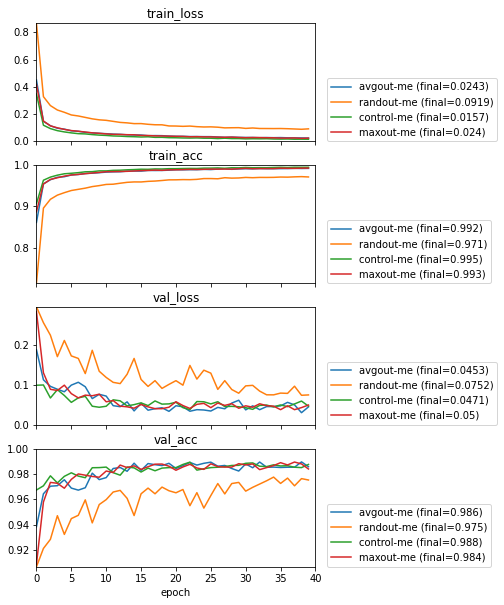

In [98]:
max_epoch = 40
num_keys = len(all_history.keys())
num_runs = len(files)
f, ax = plt.subplots(num_keys, sharex=True, figsize=(5, 10))
#f.tight_layout(pad=3.0)
for i, key in enumerate(all_history.keys()):
  runs = all_history[key]
  vals = runs.values()
  maxlen = max(map(len, vals))
  mx = max(map(max, vals))
  mn = min(map(min, vals))
  run_names = [*runs.keys()]
  ax[i].set_title(key)
  if "acc" in key.lower():
    mx = 1.0
  if "loss" in key.lower():
    mn = 0
  ax[i].set_xlim((0, maxlen))
  ax[i].set_ylim((mn, mx))
  for j, run_name in enumerate(run_names):
    x = runs[run_name][:max_epoch]
    ax[i].plot(x, label=run_name)
    #point_x, point_y = len(x)-1, x[-1]
    run_names[j] = f"{run_name} (final={x[-1] :.3})"
    #ax[i].scatter(point_x, point_y, label=run_name)
    #ax[i].text(point_x-2, point_y, f"{point_y :.2}")
  ax[i].legend(run_names, loc=(1.04,0))

ax[-1].set_xlabel("epoch");

In [99]:
fig_fname = "convergence_plots.png"
f.savefig(join(parent_dir, fig_fname), bbox_inches="tight", facecolor='white')